In [1]:
library(ggplot2)
library(lattice)
library(caret)

In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [3]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

In [4]:
# Remove the first row which contains column names
dataset <- dataset[-1, ]
# Convert the columns to their appropriate types
dataset$Sepal.Length <- as.numeric(dataset$Sepal.Length)
dataset$Sepal.Width <- as.numeric(dataset$Sepal.Width)
dataset$Petal.Length <- as.numeric(dataset$Petal.Length)
dataset$Petal.Width <- as.numeric(dataset$Petal.Width)
dataset$Species <- factor(dataset$Species)
# Verify the structure and distribution again
str(dataset)
table(dataset$Species)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...



    setosa versicolor  virginica 
        50         50         50 

In [5]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]
# Convert the Species column to a factor
dataset$Species <- as.factor(dataset$Species)
# List the levels of the Species column
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [6]:
# Inspect the structure of the dataset
str(dataset)
# Check the distribution of the Species column
table(dataset$Species)

'data.frame':	120 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 4.6 5 4.9 5.4 4.8 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.4 3.4 3.1 3.7 3.4 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.4 1.5 1.5 1.5 1.6 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.3 0.2 0.1 0.2 0.2 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...



    setosa versicolor  virginica 
        40         40         40 

In [7]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [8]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [9]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,5.1,3.5,1.4,0.2,setosa
3,4.9,3.0,1.4,0.2,setosa
4,4.7,3.2,1.3,0.2,setosa
5,4.6,3.1,1.5,0.2,setosa
6,5.0,3.6,1.4,0.2,setosa
8,4.6,3.4,1.4,0.3,setosa


In [10]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [11]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [12]:
# summarize attribute distributions: perform summary on numeric columns only
numeric_columns <- sapply(iris, is.numeric)
summary(iris[, numeric_columns])


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

In [13]:
# Visualize Dataset
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

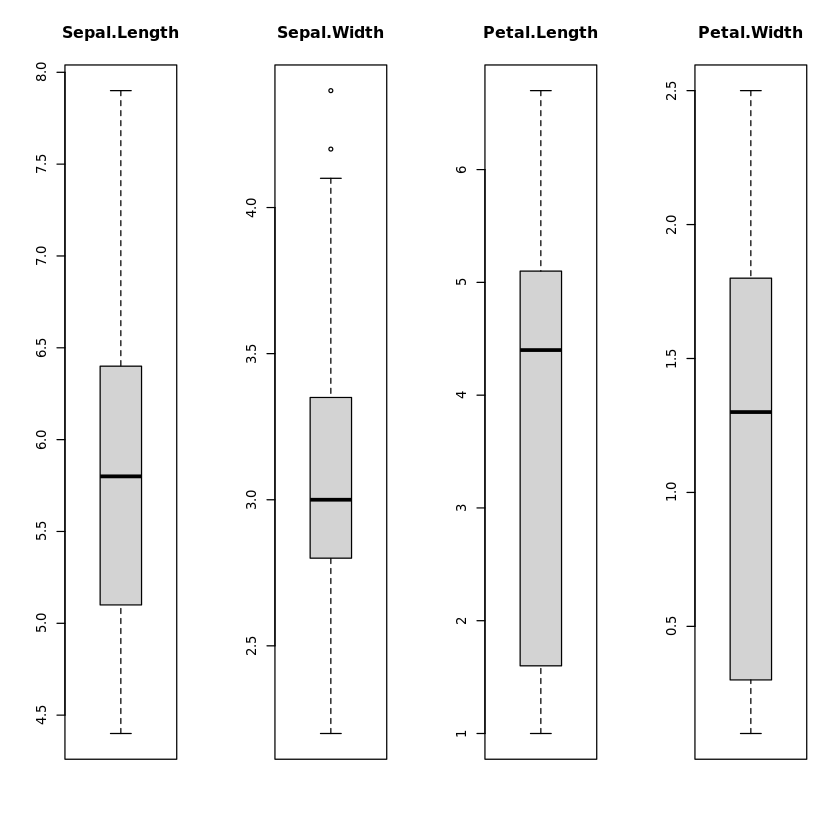

In [14]:
# split input and output
x <- dataset[, 1:4]
y <- dataset[, 5]
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

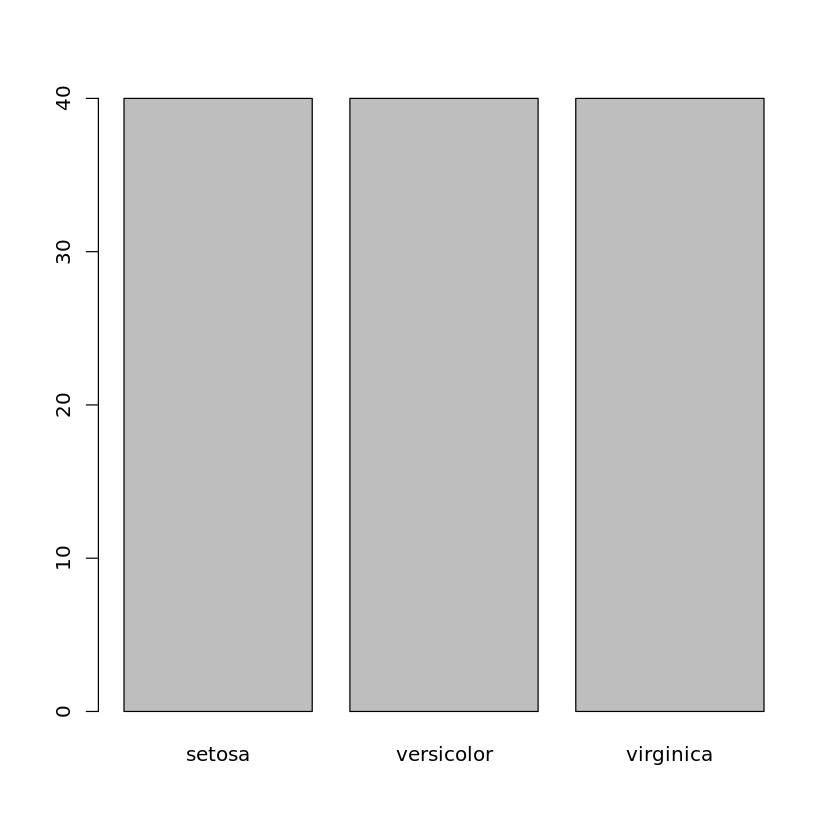

In [15]:
# barplot for class breakdown
plot(y)

ERROR while rich displaying an object: Error in grid.Call.graphics(C_downviewport, name$name, strict): Viewport 'plot_01.panel.1.1.off.vp' was not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](

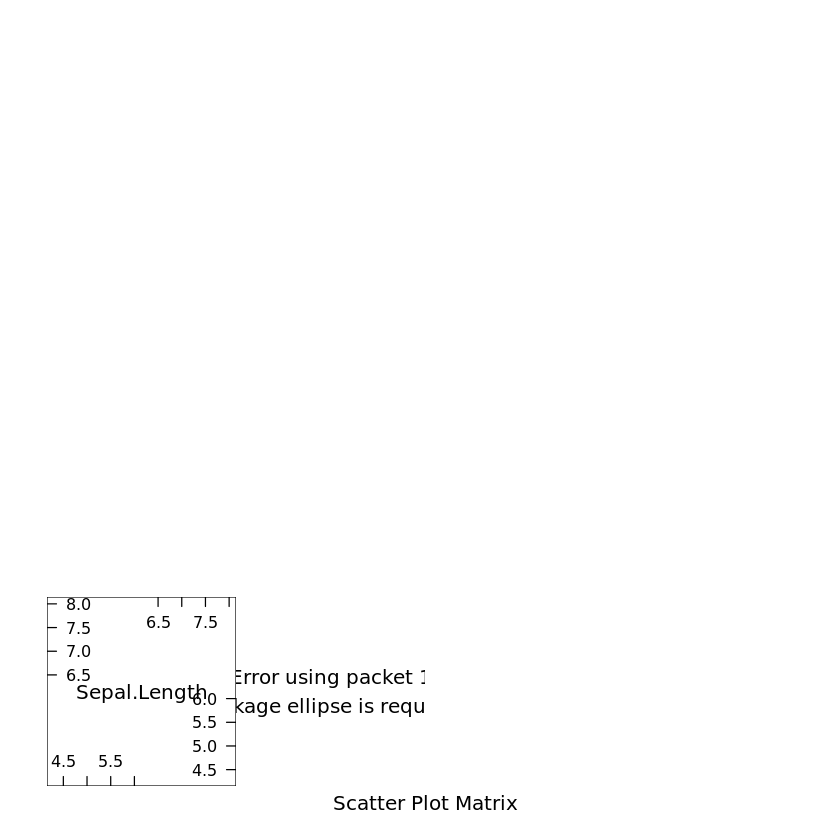

In [16]:
# scatterplot matrix
featurePlot(x = x, y = y, plot = 'ellipse')